<a href="https://colab.research.google.com/github/sergeymasl/my_lifehacks/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D1%80%D0%B0%D0%B7%D0%B2%D0%B5%D0%B4%D0%BE%D1%87%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%26_%D0%9F%D0%BE%D0%B4%D0%B3%D0%BE%D1%82%D0%BE%D0%B2%D0%BA%D0%B0_%D0%BE%D1%82%D1%87%D0%B5%D1%82%D0%BE%D0%B2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Skillbox — Мастер-класс: Разведочный анализ данных + Подготовка отчётов — Kiva.org
***

# 4. Домашнее задание
***

## 4.1. Самостоятельная работа
***

- А в каких странах преобладают мужчины? Группа людей? (п. 2.2.2.)
- Изучите несколько займов с очень большими суммами. Что можно сказать о назначении этих заявок? В каких странах они оформлены? Каков гендерный состав заявителей? (п. 2.4.2.)
- Попробуйте найти связь между странами (регионами), полом заёмщика и суммой заявки. Какие выводы можно сделать из этих данных? (п. 2.4.3.)

In [1]:
import numpy as np
import pandas as pd
import math
import missingno as msno
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')

import os

In [2]:
df_region_locations = pd.read_csv("kiva_mpi_region_locations.csv")
df_region_locations.head(5)

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [3]:
df_kiva_loans = pd.read_csv("kiva_loans.csv")
df_kiva_loans = df_kiva_loans.merge(df_region_locations[['country', 'world_region', 'MPI']], how='left')
df_kiva_loans['borrower_genders'] = [elem if elem in ['male', 'female'] else 'group' for elem in df_kiva_loans['borrower_genders']]
df_kiva_loans.drop_duplicates(inplace = True)
df_kiva_loans.head(3)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,world_region,MPI
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01,South Asia,0.184
1,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01,South Asia,0.294
2,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01,South Asia,0.247


##Самостоятельная работа по п.2.2.2

---


In [61]:
#преобразуем датафрейм в подсчет проентов от гендера
df_gender_by_country = df_kiva_loans.groupby(['country','borrower_genders'])['id'].\
    agg('count').groupby(level=0).\
    apply(lambda x: 100 * x / x.sum()).\
    unstack('borrower_genders').fillna(0)

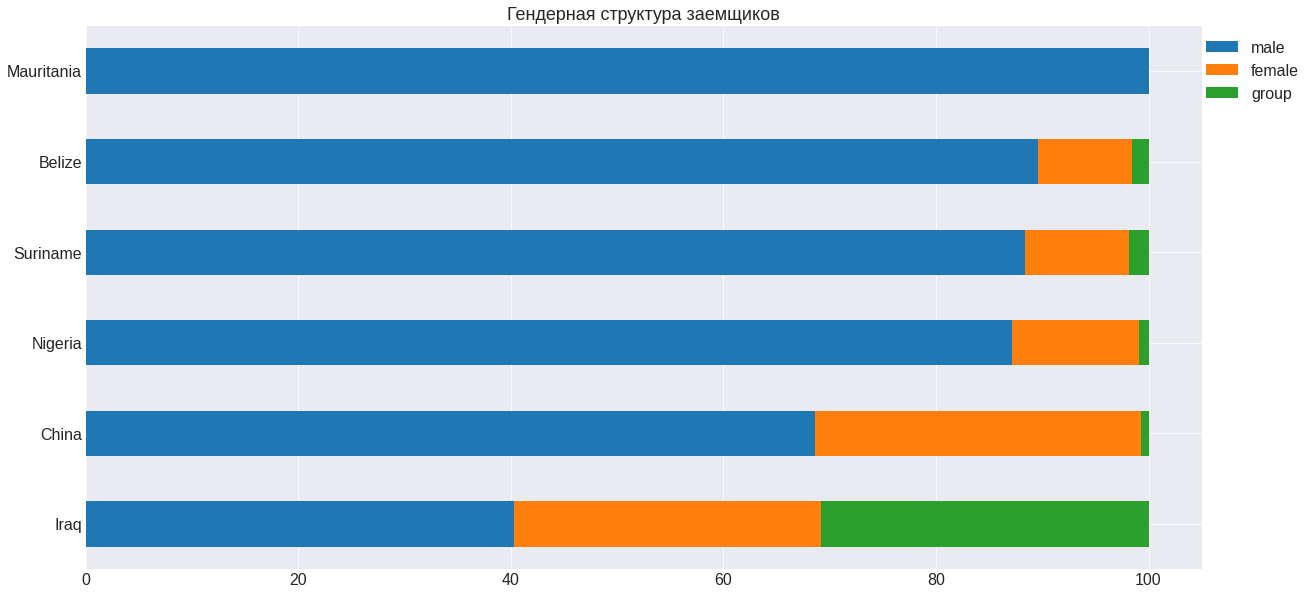

In [62]:
#преобладают мужчины
df_gender_by_country_male = df_gender_by_country.query('male > (100/3) and female < (100/3) and group < (100/3)')[['male', 'female', 'group']]
df_gender_by_country_male.sort_values(by = ['male', 'female'],ascending=True, inplace=True)
plot = df_gender_by_country_male.plot.barh(figsize=(20,10), stacked=True, fontsize=16, title='Гендерная структура заемщиков')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.1, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

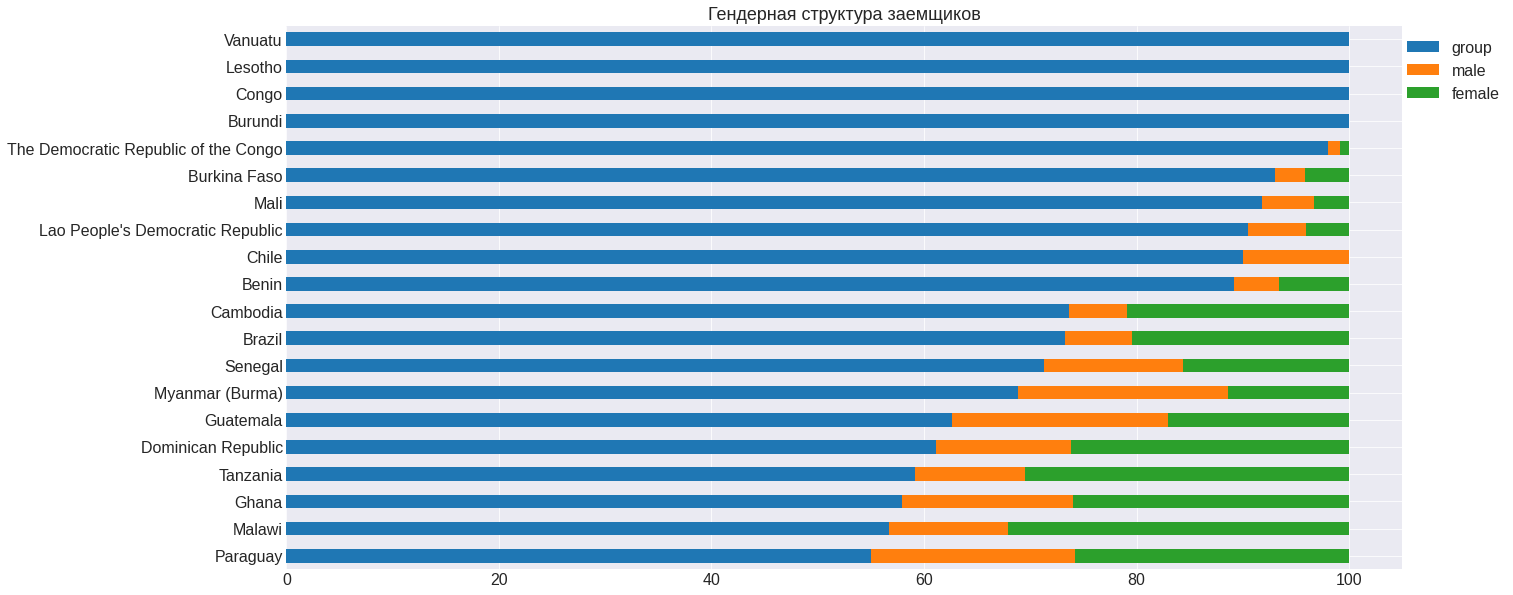

In [63]:
#преобладает группа
df_gender_by_country_group = df_gender_by_country.query('group > (100/3) and female < (100/3) and male < (100/3)')[['group', 'male', 'female']]
df_gender_by_country_group.sort_values(['group', 'male'],ascending=True, inplace=True)
plot = df_gender_by_country_group.plot.barh(figsize=(20,10), stacked=True, fontsize=16, title='Гендерная структура заемщиков')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.1, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

##Самостоятельная работа по п.2.4.2

---



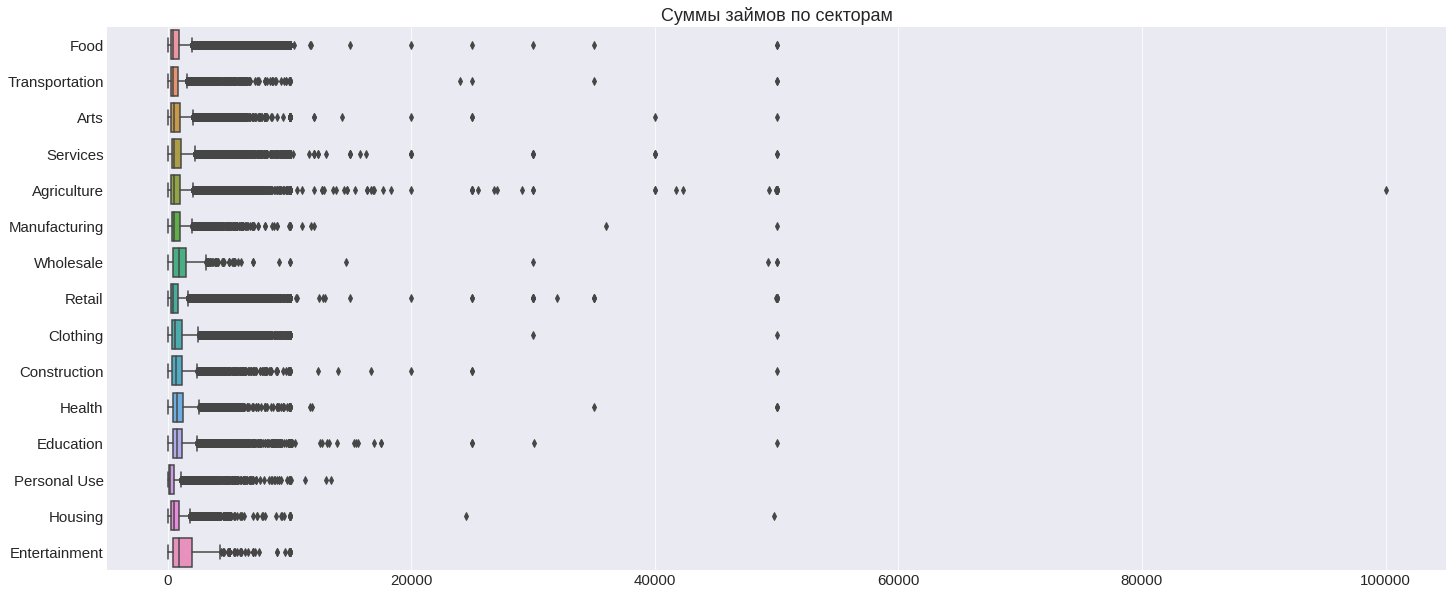

In [56]:
fig, ax = plt.subplots(figsize = (24,10))
sns.boxplot(data = df_kiva_loans, x = 'loan_amount', y = 'sector', ax = ax)
ax.set(ylabel=None, xlabel = None)
ax.set_title("Суммы займов по секторам", fontsize = 18)
plt.tick_params(labelsize=15)
plt.show()

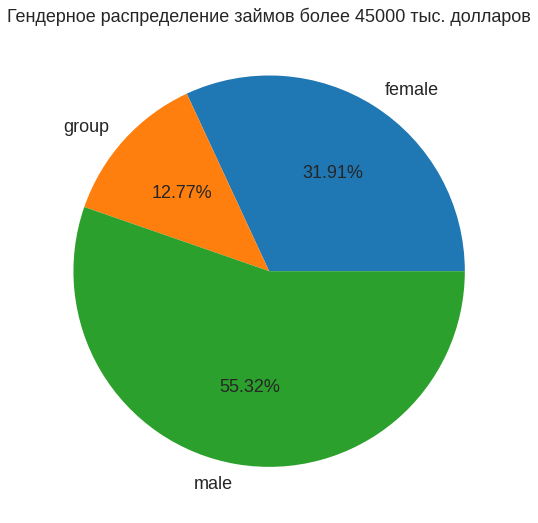

In [57]:
df_kiva_big_money = df_kiva_loans[df_kiva_loans['loan_amount'] > 45000].\
groupby('borrower_genders').agg('count')['id']

fig, ax = plt.subplots(figsize=(18,9))
wedges, labels, autopct = ax.pie(df_kiva_big_money, labels = df_kiva_big_money.index, autopct='%1.2f%%')
plt.setp(labels, fontsize=18)
plt.setp(autopct, fontsize=18)
ax.set_title('Гендерное распределение займов более 45000 тыс. долларов', fontsize = 18)
plt.show()

In [72]:
region_big_money = df_kiva_loans[df_kiva_loans['loan_amount'] > 45000]['world_region'].value_counts()
region_big_money

Sub-Saharan Africa             24
Latin America and Caribbean    16
East Asia and the Pacific       1
South Asia                      1
Europe and Central Asia         1
Name: world_region, dtype: int64

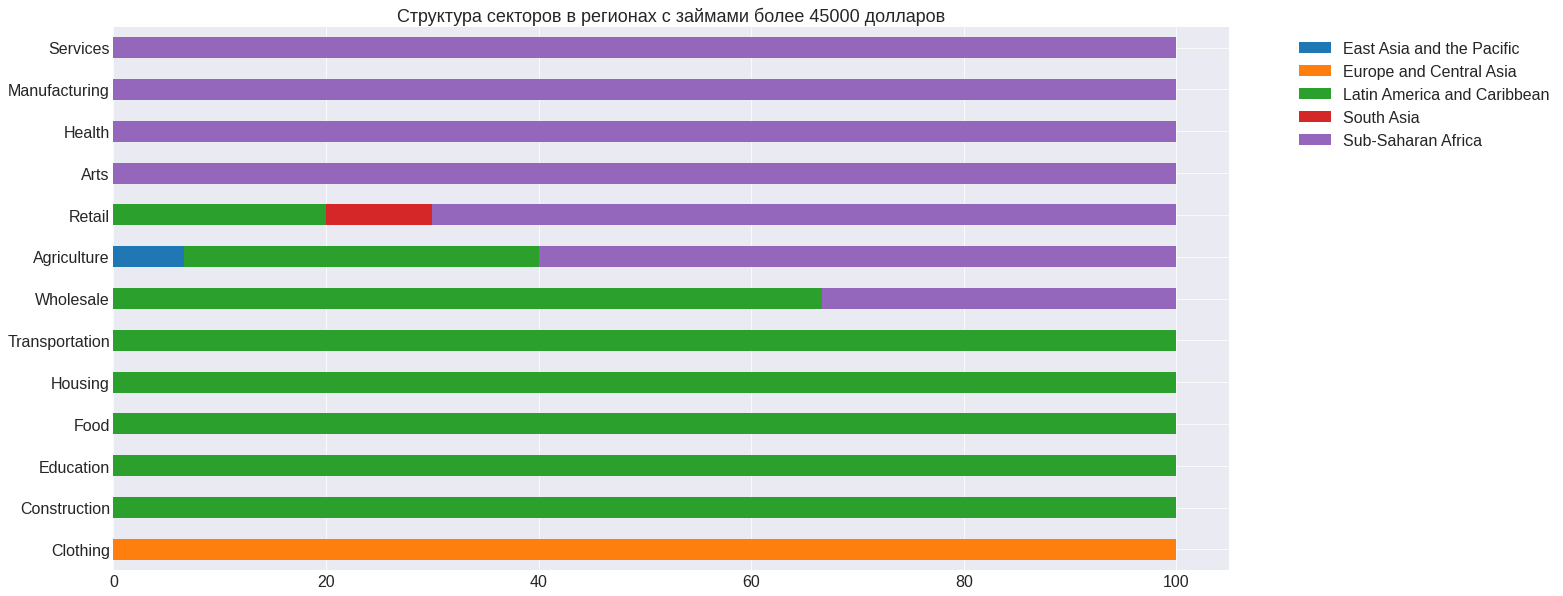

In [76]:
sector_region_big_money = df_kiva_loans[df_kiva_loans['loan_amount'] > 45000].groupby(['sector', 'world_region'])['id'].\
    agg('count').groupby(level=0).\
    apply(lambda x: 100 * x / x.sum()).\
    unstack('world_region').fillna(0)
sector_region_big_money.sort_values(by = ['Sub-Saharan Africa', 'Latin America and Caribbean', 'East Asia and the Pacific', 'South Asia', 'Europe and Central Asia'],ascending=True, inplace=True)
plot = sector_region_big_money.plot.barh(figsize=(20,10), stacked=True, fontsize=16, title='Структура регионов в секторах с займами более 45000 долларов')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.3, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

In [60]:
df_kiva_loans[df_kiva_loans['loan_amount'] == df_kiva_loans['loan_amount'].max()]

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,world_region
820810,722883,100000.0,100000.0,Agriculture,Agriculture,create more than 300 jobs for women and farmer...,HT,Haiti,Les Cayes,USD,315.0,2014-06-10 19:25:02+00:00,2014-09-08 07:00:00+00:00,2014-06-19 20:21:04+00:00,75.0,2986,"user_favorite, user_favorite, user_favorite, u...",female,irregular,2014-06-10,Latin America and Caribbean


Выводы для самостоятельной работы по п.2.4.2:

1.  Большинство займов на суммы более 45000 долларов выданы мужчинам
2.  Займы на суммы более 45000 долларов выданы в 5 регионов мира, а именно Черная Африка, Латинская Америка, Восточная Азия, Южная Азия, Европа и центральная Азия
3. Займы более 45000 долларов в регионах Южная и Восточная Азия, а так же Европа получены на моно - сектора экономики, Прододажи, Агропромышленность и одежда соответственно. В регионах Черной Африки и Латинской Америки такие займы получены для нескольких направлений.
4. Самый большой займ выдан женщине из Гаити на "Создание рабочих мест для фермеров"




## Самостоятельная работа по п.2.4.3:

Попробуйте найти связь между странами (регионами), полом заёмщика и суммой заявки. Какие выводы можно сделать из этих данных?

In [13]:
# Наблюдаемое отклонение от среднего
dev = (df_kiva_loans['loan_amount']-df_kiva_loans['loan_amount'].mean()).abs()
# Стандартное отклонение
std = df_kiva_loans['loan_amount'].std()
# Фильтруем исходный набор данных
df_kiva_loans_trimmed = df_kiva_loans[~(dev>3*std)]

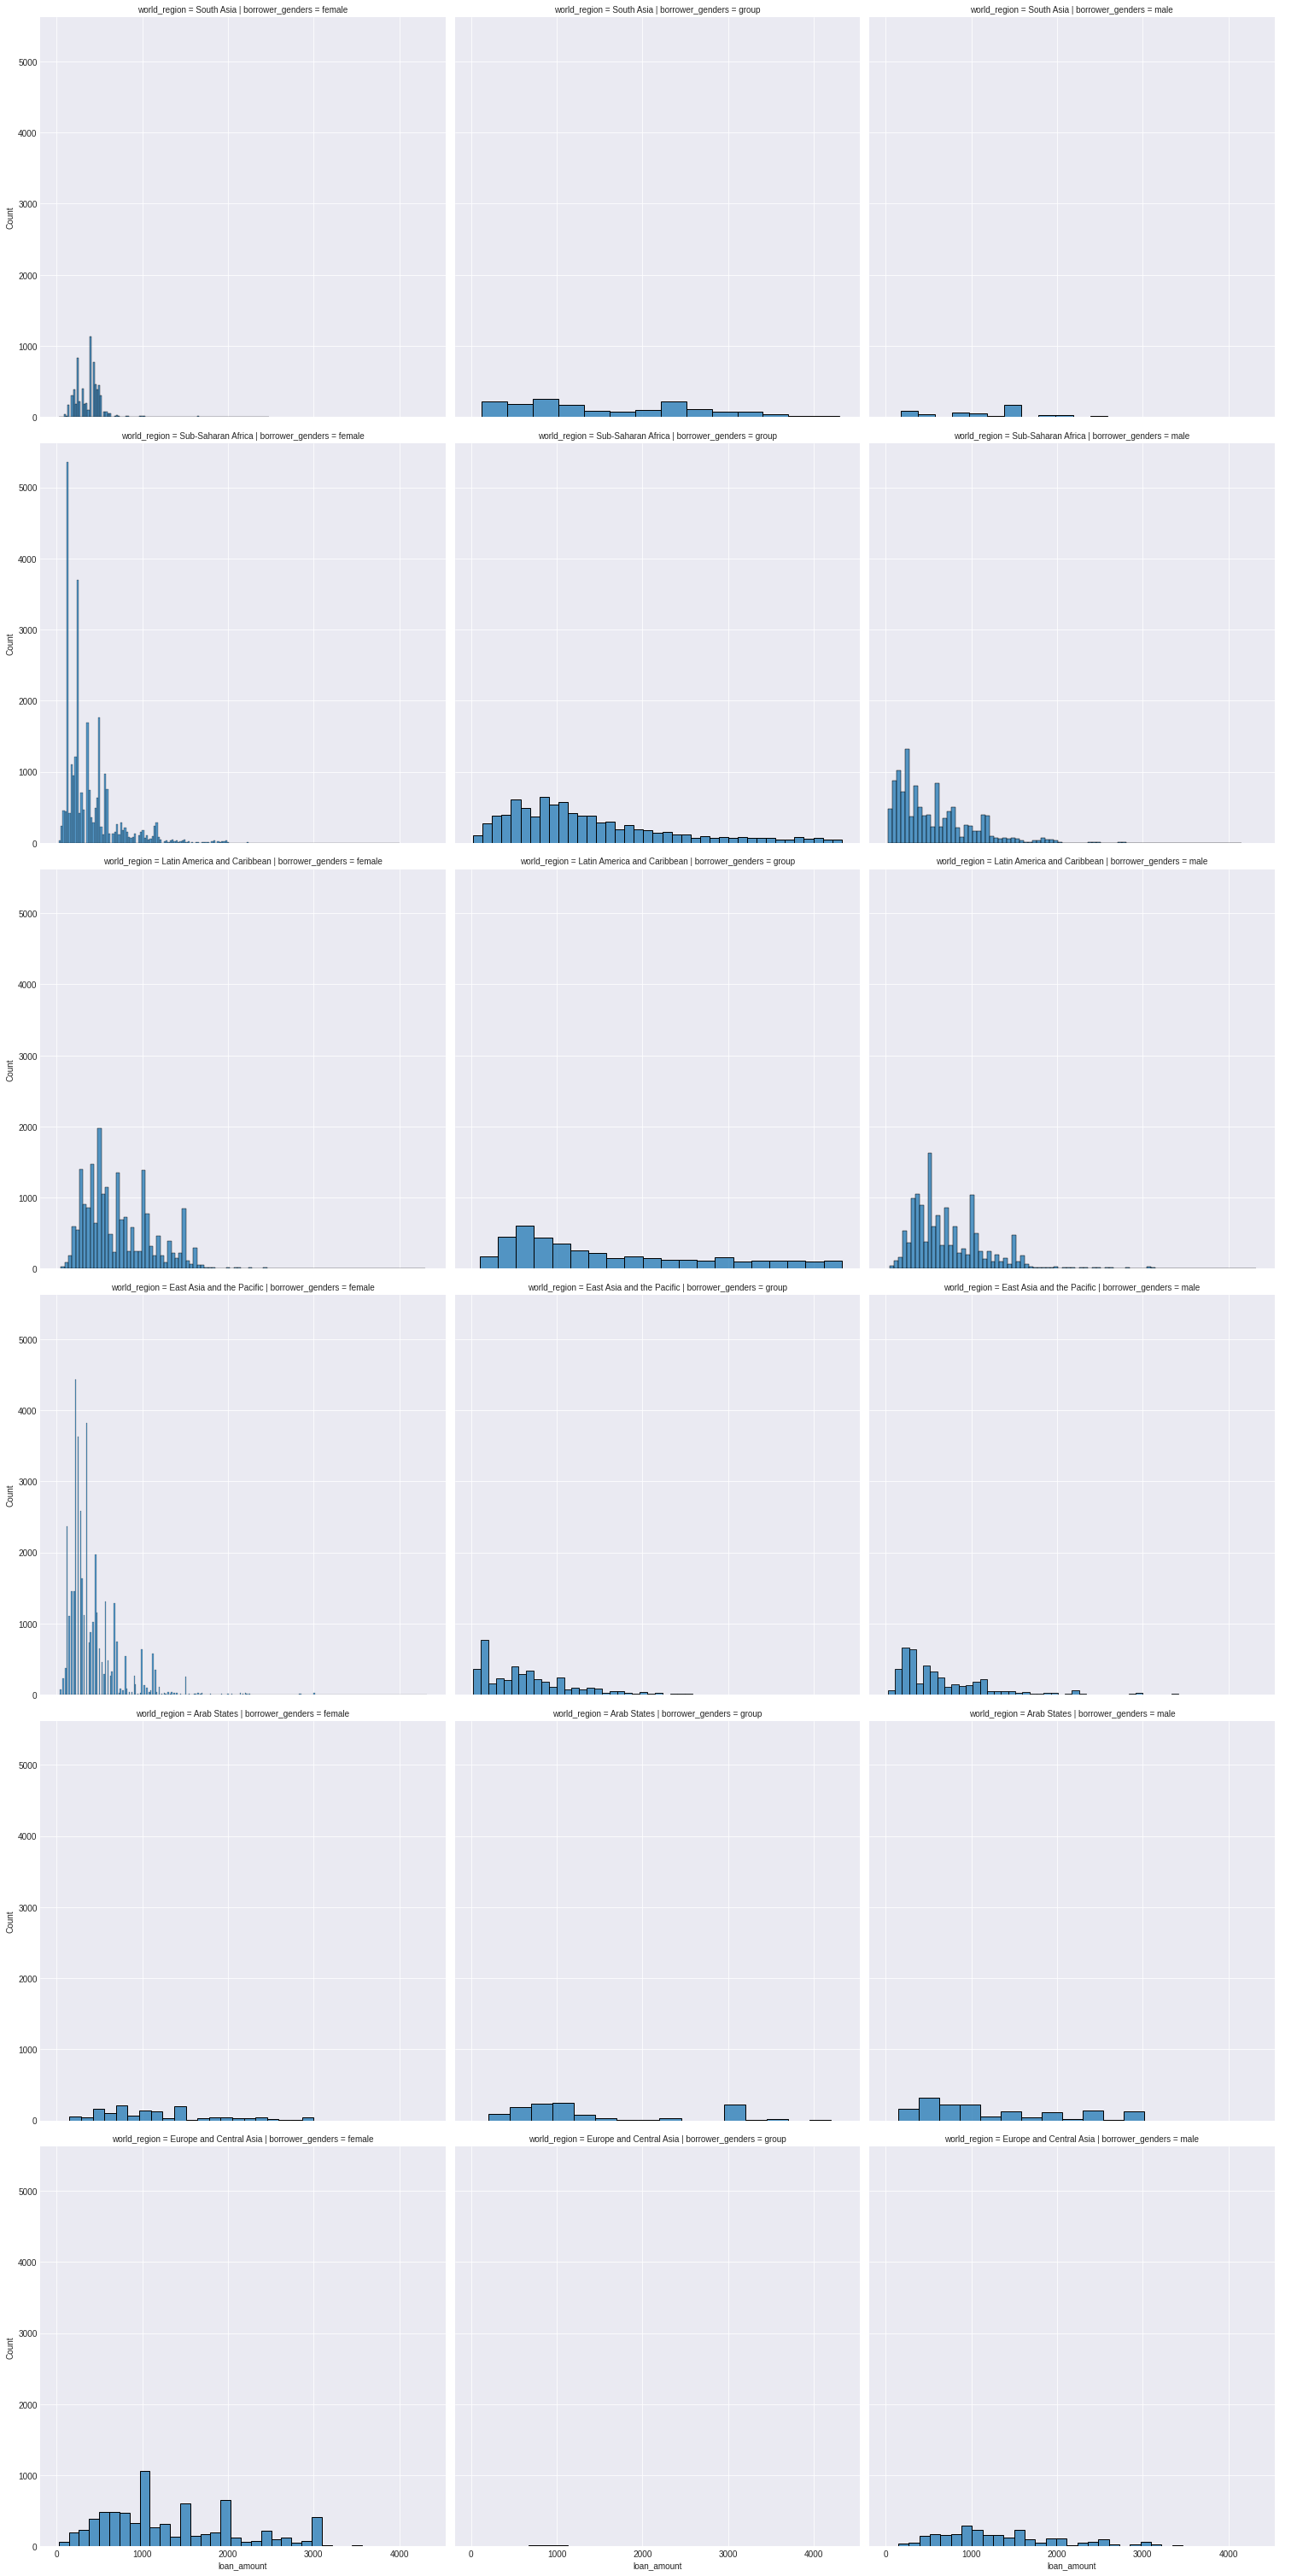

In [16]:
g = sns.FacetGrid(df_kiva_loans_trimmed, col='borrower_genders', row = 'world_region', height=7)
g.map(sns.histplot, 'loan_amount')
g.add_legend(fontsize = 15)

Выводы для самостоятельной работы по п.2.4.3:

1. Во всех регионах за исключением Латинской Америки и Арабского мира, большинство заемщиков женщины. (в двух перечисленных займы сравнимы)
2. В Европе не востребованны займы для групп
3. Более большие по сумме займы берут группы людей
4. Наибольшу разницу по количеству займов между женщинами и мужчинами представляют регионы Черная Африка и Восточная Азия

## 4.2. Домашняя работа
***

Расширьте наш отчёт исследованием следующих вопросов:

- Зависимость пола заёмщика от региона планеты, сектора экономики.
- Влияние такого атрибута займа, как **Количество кредиторов** (lender_count), на суммы и сроки займов.
- Влияние показателя **MPI** (многомерный индекс бедности) в разных странах на суммы займов и сроки погашения.
- Зависимости таких метрик, как «Сумма займа», «Срок займа», «Время финансирования заявки», «Ежемесячный платёж», в разрезе **макрорегионов**.

## Зависимость пола заемщика от региона планеты, сектора экономики.

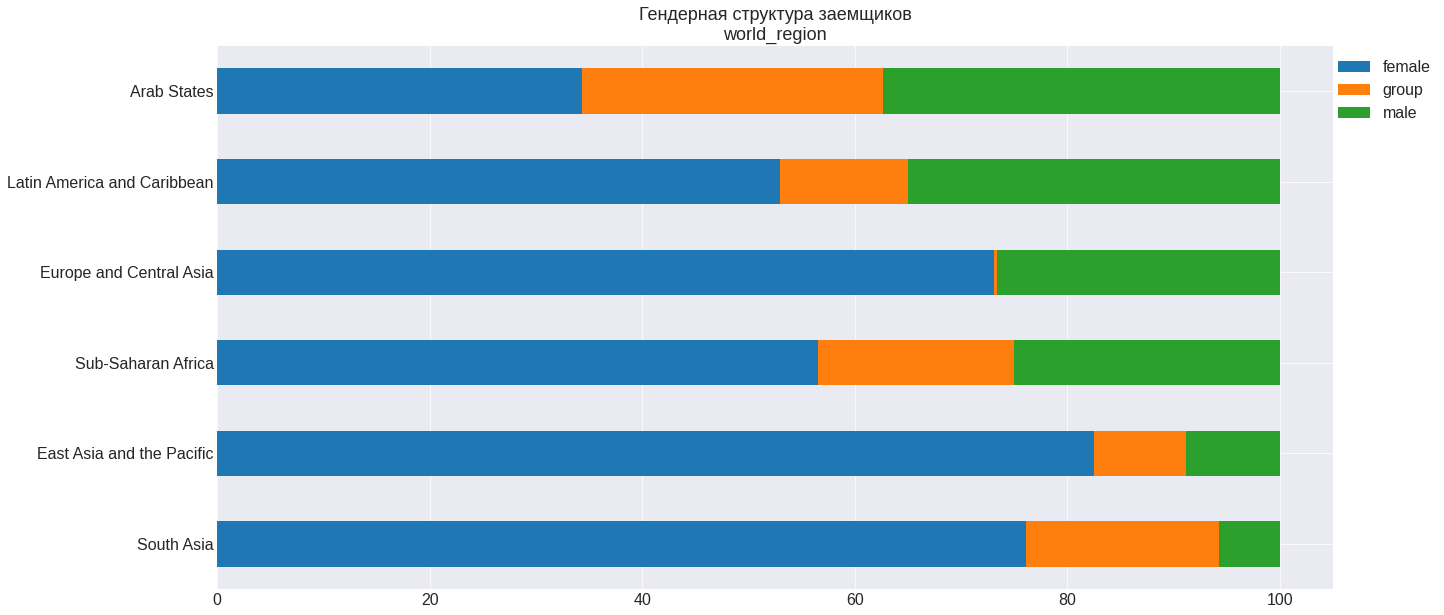

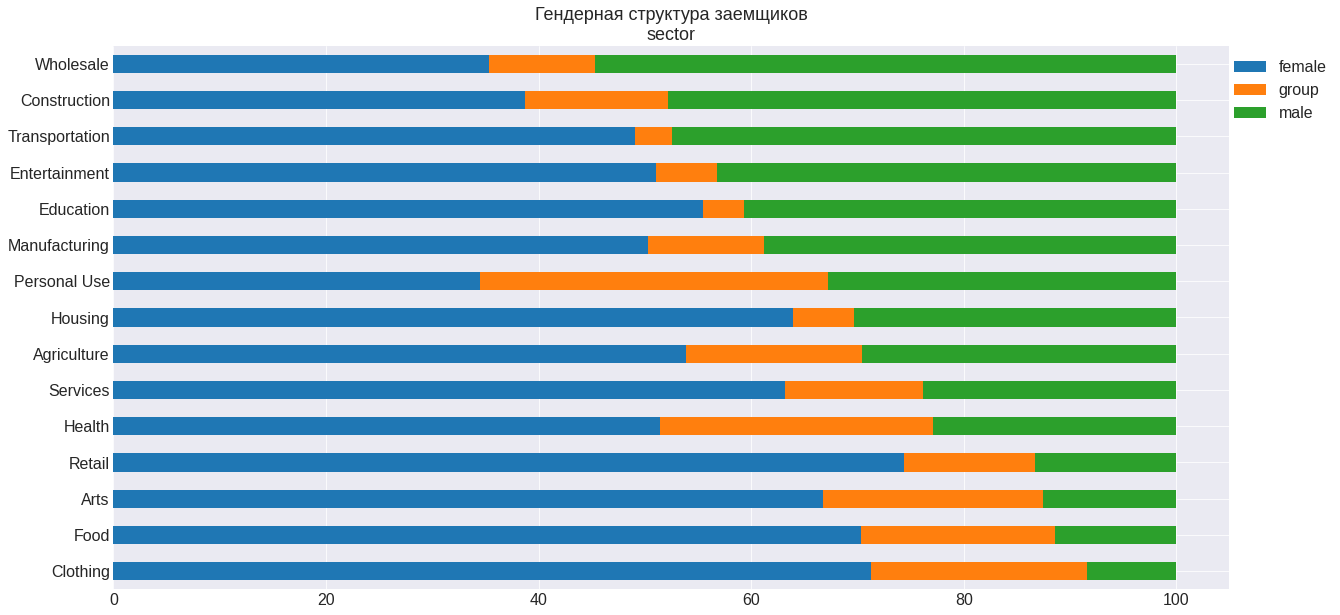

In [32]:
#fig, ax = plt.subplots(nrows=2, figsize = (18,10))

for i, descriptor in enumerate(['world_region', 'sector']):
  df_kiva_loans_descript = df_kiva_loans.groupby([descriptor, 'borrower_genders']).agg('count')['id'].groupby(level=0).\
    apply(lambda x: 100 * x / x.sum()).\
    unstack('borrower_genders').fillna(0)
  df_kiva_loans_descript.sort_values(['male','group','female'], ascending = True, inplace = True)
  plot = df_kiva_loans_descript.plot.barh(figsize=(20,10), stacked=True, fontsize=16, title='Гендерная структура заемщиков' + '\n' + descriptor)
  plot.title.set_size(18)
  plot.legend(loc=1, bbox_to_anchor=(1.1, 1), fontsize=16)
  plot.set(ylabel=None, xlabel=None)
plt.show()

Выводы:
1. Женщины не преобладают только в Арабских эмиратах
2. Мужчины преобладают в опте и строительстве во всех остальных сферах преоблажают женщины

## Влияние такого атрибута займа, как Количество кредиторов (lender_count), на суммы и сроки займов

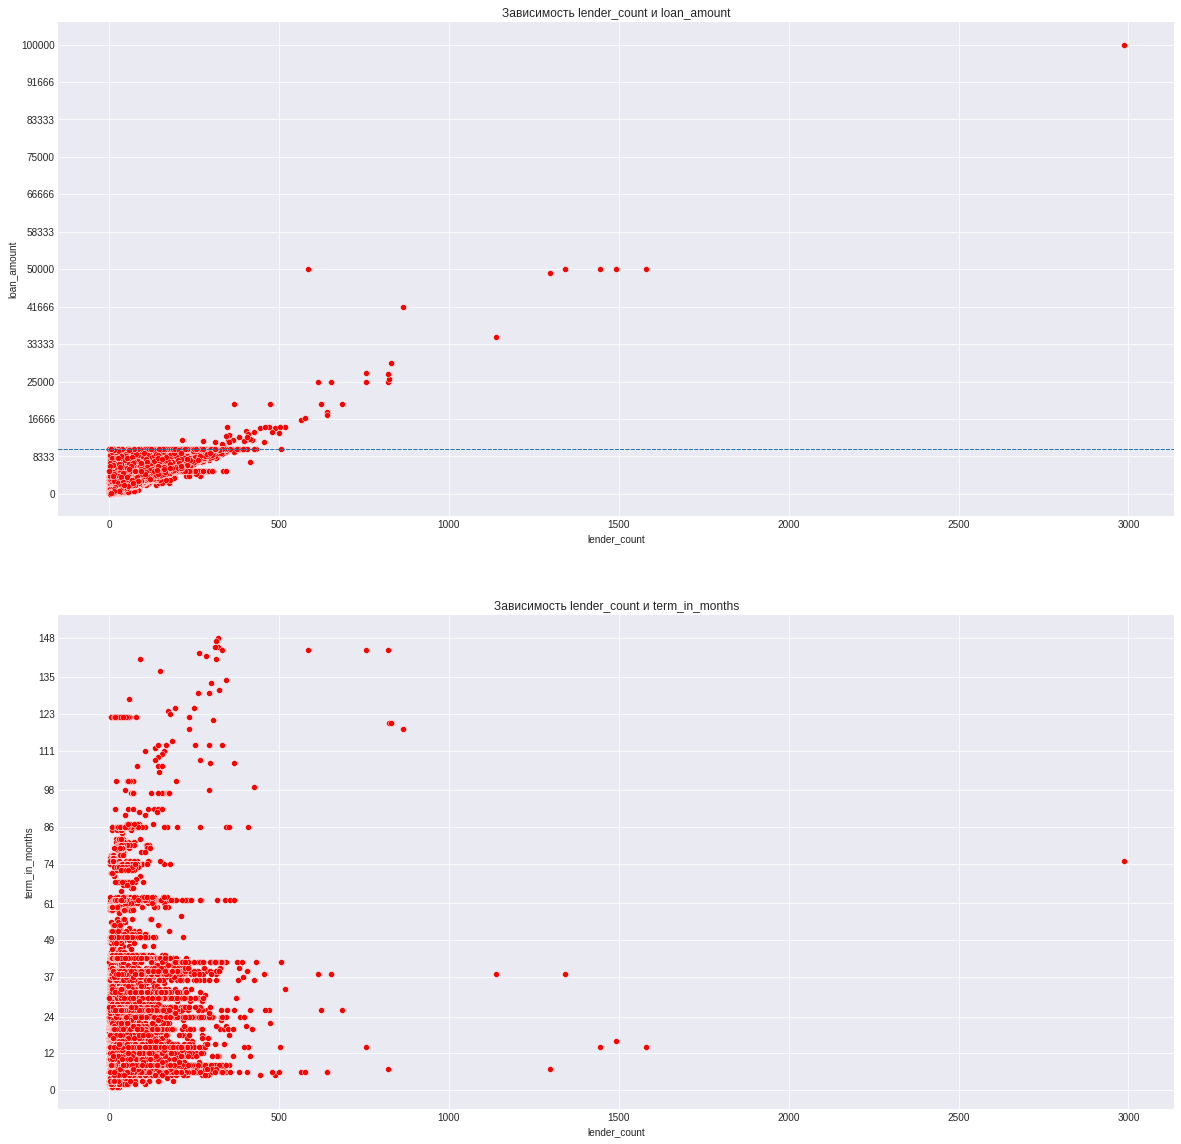

In [95]:
#рассмотрим влияние количества кредиторов на сумму займа
fig, ax = plt.subplots(figsize = (20,20), nrows=2)
for i, descriptor in enumerate(['loan_amount', 'term_in_months']):
  sns.scatterplot(x='lender_count', y = descriptor, data = df_kiva_loans, ax = ax[i], color = 'red')
  ax[i].set_yticks([int(i) for i in np.arange(0, df_kiva_loans[descriptor].max() +1, df_kiva_loans[descriptor].max() / 12)])
  ax[i].set_title('Зависимость lender_count и ' + str(descriptor))
  ax[0].axhline(10000, linewidth = 1, linestyle = '--')
plt.show()  

Выводы:
1. Чем болшье кредиторов, тем более большой займ выдается
2. Однако займы до 10 000 могут быть выданы как 1 так и 500 кредиторами
3. Займы от 10 000 выдаются группами заемщиков, численностью более 200 человек
4. Зависимость между количеством кредиторов и сроком займа не обнаружена 

## Влияние показателя MPI (многомерный индекс бедности) в разных странах на суммы займов и сроки погашения

In [161]:
# Разделим MPI на группы, для этого пропишем функцию
def mpi_group(x):
  group_list = list(np.arange(0.1,1.1,0.1))
  max_group = 0.1
  for i in group_list:
    if x / i >= 1:
      max_group = i + 0.1
  return (str('от ' + str(round(max_group - 0.1, 1)) + ' до ' + str(round(max_group, 1))))

In [165]:
df_mpi = df_kiva_loans
df_mpi['group_mpi'] = df_mpi['MPI'].apply(mpi_group)

In [166]:
df_mpi_group = df_mpi.groupby('group_mpi').agg('median')[['loan_amount', 'term_in_months']]

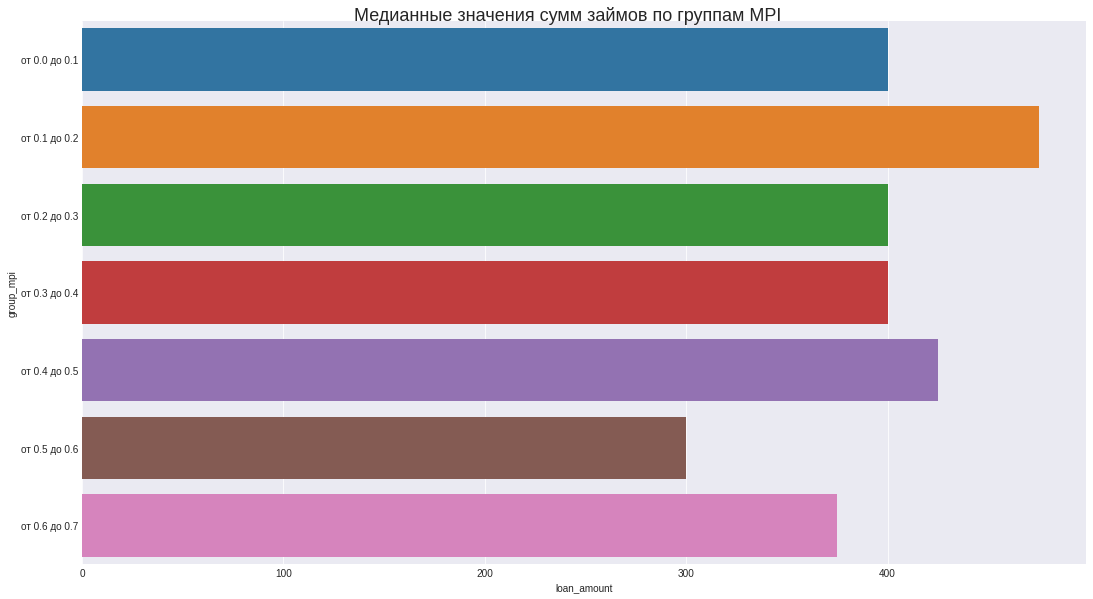

In [173]:
fig, ax = plt.subplots(figsize = (18,10))
sns.barplot(data=df_mpi_group, y = df_mpi_group.index, x = 'loan_amount', ax = ax)
fig.suptitle('Медианные значения сумм займов по группам MPI', y = 0.9, fontsize = 18)
plt.show()

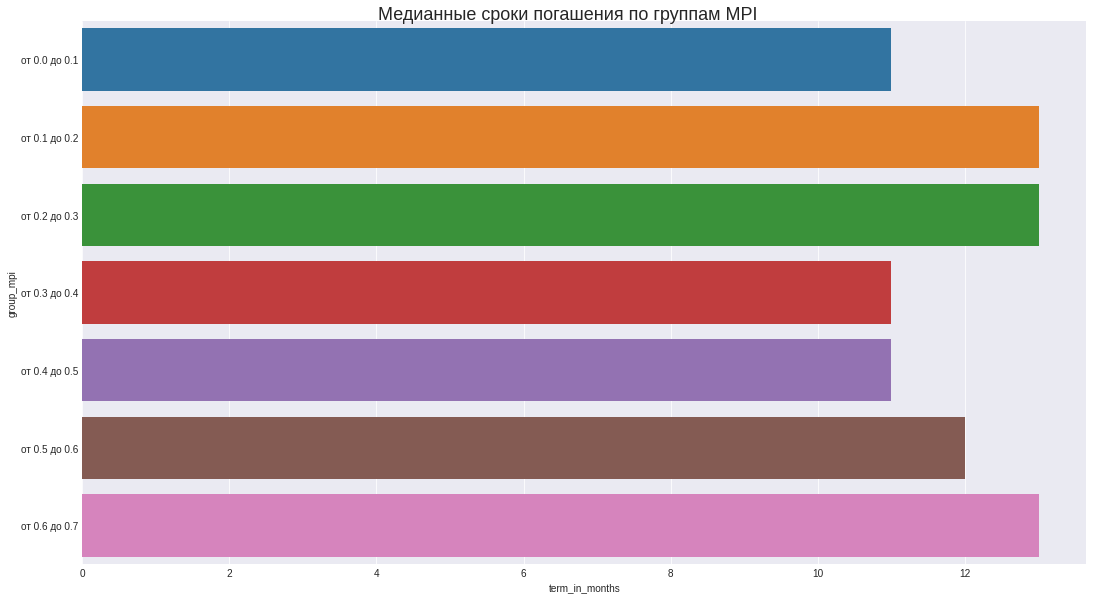

In [177]:
fig, ax = plt.subplots(figsize = (18,10))
sns.barplot(data=df_mpi_group, y = df_mpi_group.index, x = 'term_in_months', ax = ax)
fig.suptitle('Медианные сроки погашения по группам MPI', y = 0.9, fontsize = 18)
plt.show()

Выводы:
1. Самые большие суммы займов призодтся на страны с MPI от 0,1 до 0,2
2. Самые малые суммы займов приходятся на страны с MPI от 0,5 до 0,6
3. Зависимость в сроках погашения не обнаружено

## Зависимости таких метрик, как «Сумма займа», «Срок займа», «Время финансирования заявки», «Ежемесячный платёж», в разрезе макрорегионов

In [ ]:
df_last = df_kiva_loans[['world_region','loan_amount', 'term_in_months', 'disbursed_time', 'funded_time']]
df_last.loc[:,'month_pay'] = df_last['loan_amount'] / df_last['term_in_months']
df_last.dropna(subset=['disbursed_time', 'funded_time'], how='any', inplace=True)
dates = ['disbursed_time','funded_time']
df_last.loc[:, dates] = df_last[dates].applymap(lambda x : x.split('+')[0])
df_last[dates] = df_last[dates].apply(pd.to_datetime)

df_last.loc[:, 'time_finan'] = df_last['funded_time']-df_last['disbursed_time']
df_last.loc[:, 'time_finan'] = df_last['time_finan'] / timedelta(days=1)

del df_last['disbursed_time']
del df_last['funded_time']

In [96]:
df_last = df_last.groupby('world_region').agg({'loan_amount' : 'mean', 'term_in_months' : 'median', 'month_pay' : 'median', 'time_finan' : 'median'}).\
sort_values('loan_amount', ascending= False)
df_last

,loan_amount,term_in_months,month_pay,time_finan
world_region,,,,
Arab States,1089.695378,14.0,52.083333,26.426262
Latin America and Caribbean,1016.116762,14.0,48.214286,34.377639
Europe and Central Asia,819.605804,14.0,41.071429,33.484005
Sub-Saharan Africa,561.373008,13.0,28.571429,23.143611
South Asia,478.721025,14.0,28.571429,32.591343
East Asia and the Pacific,412.855215,8.0,30.487805,28.476875


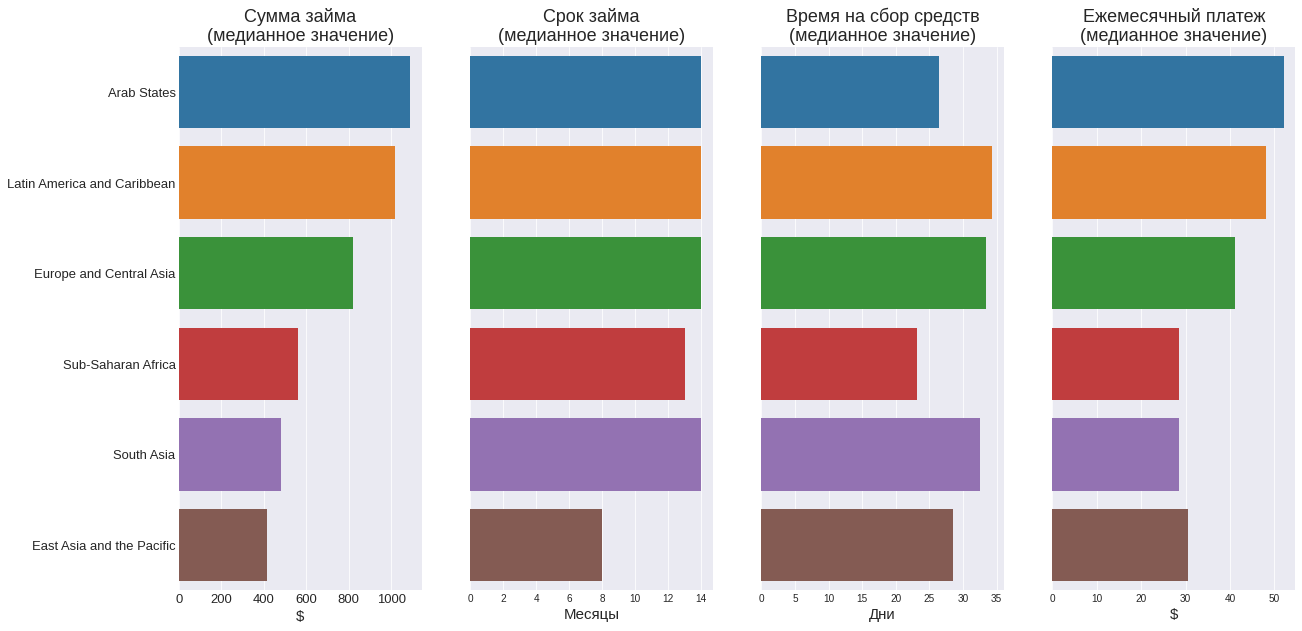

In [97]:
fig, ax = plt.subplots(ncols=4, figsize=(20,10), sharey=True)

sns.barplot(data=df_last, y = df_last.index, x ='loan_amount', ax = ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel('$', fontsize = 15)
ax[0].set_title('Сумма займа\n(медианное значение)', fontsize = 18)
ax[0].tick_params(labelsize=13)

sns.barplot(data=df_last, y = df_last.index, x ='term_in_months', ax = ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel('Месяцы', fontsize = 15)
ax[1].set_title('Срок займа\n(медианное значение)', fontsize = 18)

sns.barplot(data=df_last, y = df_last.index, x ='time_finan', ax = ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel('Дни', fontsize = 15)
ax[2].set_title('Время на сбор средств\n(медианное значение)', fontsize = 18)

sns.barplot(data=df_last, y = df_last.index, x ='month_pay', ax = ax[3])
ax[3].set_ylabel(None)
ax[3].set_xlabel('$', fontsize = 15)
ax[3].set_title('Ежемесячный платеж\n(медианное значение)', fontsize = 18)

plt.show()

Выводы:
1. Быстрее всего собирают средства для Черной Африки